# SSH Plots

In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import cartopy.crs as ccrs                 
import cartopy
import gsw
import pandas as pd

In [2]:
#file = '../Data/dataset-duacs-nrt(7:10:219).nc'
file = '/Users/lfp/Desktop/SSH/c3s_obs-sl_glo_phy-ssh_my_twosat-l4-duacs-0.25deg_P1D_1649023037640.nc'


In [3]:
ds = xr.open_dataset(file)

In [4]:
ds

<xarray.Dataset>
Dimensions:         (time: 366, latitude: 81, longitude: 81, nv: 2)
Coordinates:
  * latitude        (latitude) float32 4.875 5.125 5.375 ... 24.38 24.62 24.88
  * nv              (nv) int32 0 1
  * time            (time) datetime64[ns] 2016-01-01 2016-01-02 ... 2016-12-31
  * longitude       (longitude) float32 79.88 80.12 80.38 ... 99.38 99.62 99.88
Data variables: (12/14)
    ugos            (time, latitude, longitude) float64 ...
    vgos            (time, latitude, longitude) float64 ...
    vgosa           (time, latitude, longitude) float64 ...
    crs             int32 ...
    err_vgosa       (time, latitude, longitude) float64 ...
    sla             (time, latitude, longitude) float64 ...
    ...              ...
    flag_ice        (time, latitude, longitude) float64 ...
    adt             (time, latitude, longitude) float64 ...
    err_ugosa       (time, latitude, longitude) float64 ...
    tpa_correction  (time) float64 ...
    err_sla         (time, latitude, longitude) float64 ...
    lon_bnds        (longitude, nv) float32 ...
Attributes: (12/45)
    Conventions:                                    CF-1.6
    FROM_ORIGINAL_FILE__Metadata_Conventions:       Unidata Dataset Discovery...
    cdm_data_type:                                  Grid
    comment:                                        Sea Surface Height measur...
    contact:                                        http://climate.copernicus...
    creator_email:                                  http://climate.copernicus...
    ...                                             ...
    time_coverage_duration:                         P1D
    time_coverage_end:                              2021-08-02T12:00:00Z
    time_coverage_resolution:                       P1D
    time_coverage_start:                            2021-08-01T12:00:00Z
    title:                                          DT merged two satellites ...
    _CoordSysBuilder:                               ucar.nc2.dataset.conv.CF1...

In [174]:
lon, lat= np.meshgrid(ds.longitude, ds.latitude)
u = np.squeeze(ds.ugos).values
v = np.squeeze(ds.vgos).values

In [175]:
u.shape

(366, 81, 81)

In [162]:
lon.shape

(81, 81)

In [110]:
%matplotlib inline  
#%matplotlib qt5


plt.rcParams['figure.figsize'] = (5,4)
plt.rcParams['figure.dpi'] = 200
plt.rcParams['savefig.dpi'] = 400
plt.close('all')

__figdir__ = '/Users/lfp/Desktop/SSH/plots/'
savefig_args = {'bbox_inches':'tight', 'pad_inches':0.2}
plotfiletype='png'

# define savefig if we want to use if savefig 
savefig = 1



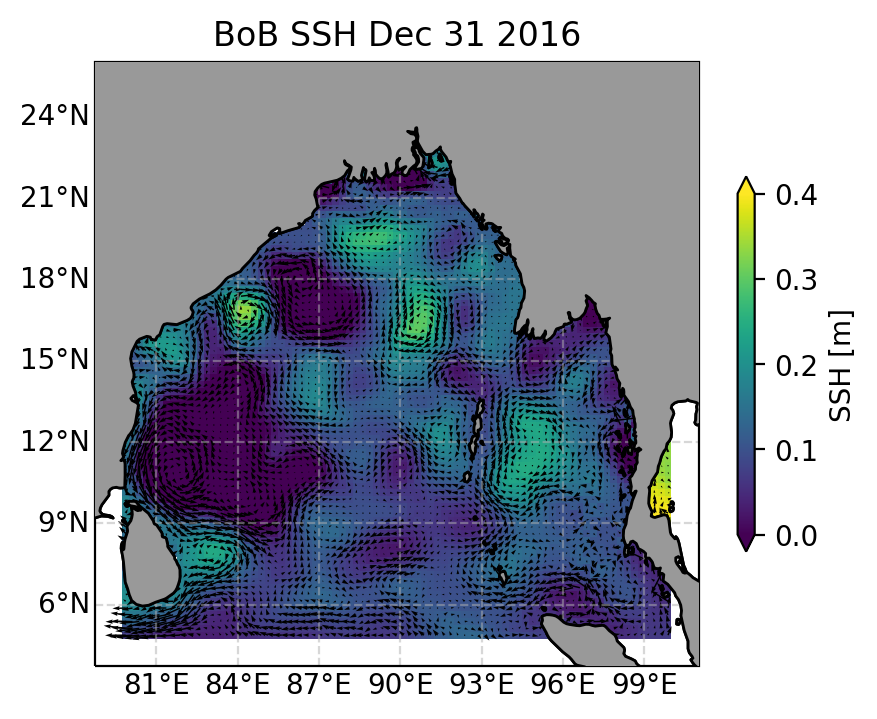

In [203]:
for i in range(len(ds.time)):
    
    plt.close('all')

    ax = plt.axes(projection = ccrs.PlateCarree(central_longitude=200))  # Orthographic
    day_str=ds.time.dt.strftime("%b %d %Y").values[i]
    ax.set_title(f'BoB SSH '+day_str)

    gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, alpha=0.5, linestyle='--')
    gl.top_labels = False
    gl.ylabels_right = False
    

    cs = ax.pcolormesh(ds.longitude,ds.latitude,np.squeeze(ds.isel(time=i).sla), transform=ccrs.PlateCarree())
    cb = plt.colorbar(cs,fraction = 0.022, extend='both') 
    cb.set_label('SSH [m]',fontsize = 10)
    ax.coastlines()
    ax.add_feature(cartopy.feature.LAND, zorder=3, facecolor=[.6,.6,.6], edgecolor='black')
    #ax.add_feature(cartopy.feature.RIVERS,zorder=5)

    q = ax.quiver(lon, lat, u[i], v[i], scale = 25, transform=ccrs.PlateCarree())
    #qk = ax.quiverkey(q, 0.7, 0.8, 1, r'$1 \frac{m}{s}$',labelpos='N', coordinates='figure')
    #qk.set(zorder=5)

    plt.savefig(__figdir__+'SSH'+str(i)+'.'+plotfiletype,**savefig_args)
    #plt.clf()


In [204]:
!ffmpeg -framerate 10 -i $__figdir__/SSH%d.png -s 1920x1080 $__figdir__/ssh_2016_BoB.avi -y #make a video using ffmpeg

ffmpeg version N-105691-gc439c6b191-tessus  https://evermeet.cx/ffmpeg/  Copyright (c) 2000-2022 the FFmpeg developers
  built with Apple clang version 11.0.0 (clang-1100.0.33.17)
  configuration: --cc=/usr/bin/clang --prefix=/opt/ffmpeg --extra-version=tessus --enable-avisynth --enable-fontconfig --enable-gpl --enable-libaom --enable-libass --enable-libbluray --enable-libdav1d --enable-libfreetype --enable-libgsm --enable-libmodplug --enable-libmp3lame --enable-libmysofa --enable-libopencore-amrnb --enable-libopencore-amrwb --enable-libopenh264 --enable-libopenjpeg --enable-libopus --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvmaf --enable-libvo-amrwbenc --enable-libvorbis --enable-libvpx --enable-libwebp --enable-libx264 --enable-libx265 --enable-libxavs --enable-libxvid --enable-libzimg --enable-libzmq --enable-libzvbi --enable-version3 --pkg-config-flags=--static

/Users/lfp/opt/anaconda3/lib/python3.9/site-packages/cartopy/mpl/gridliner.py:343: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '


TypeError: Input z must be 2D, not 3D

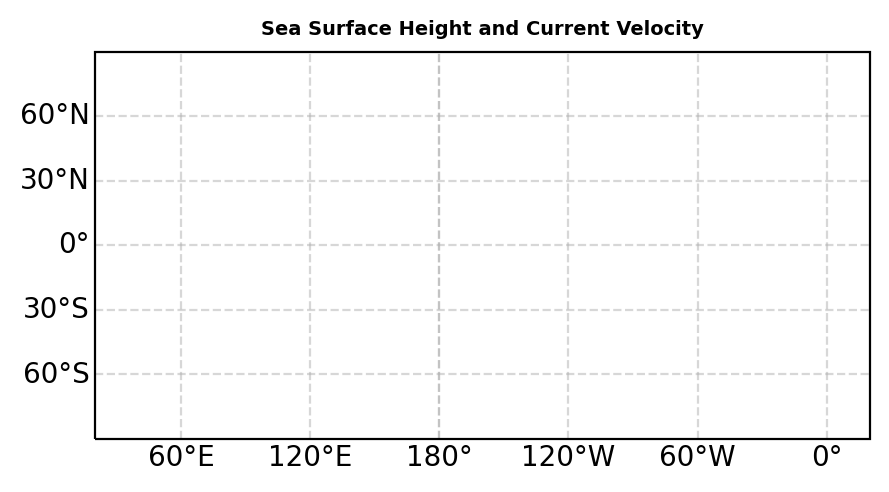

In [13]:
ax = plt.axes(projection = ccrs.PlateCarree(central_longitude=200))  # Orthographic
ax.set_title('Sea Surface Height and Current Velocity', fontsize=7, fontweight='bold')

plt.set_cmap(cmap=plt.get_cmap('nipy_spectral'))
plt.set_cmap(cmap=plt.get_cmap('turbo'))
    
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, alpha=0.5, linestyle='--')
gl.top_labels = False
gl.ylabels_right = False

levels = 10 #related to dataframe

cs = ax.contourf(ds.longitude,ds.latitude,np.squeeze(sla), levels, extend='both', transform=ccrs.PlateCarree())

#cb = plt.colorbar(cs,ax=ax,shrink=.8,pad=.05)
cb = plt.colorbar(cs,fraction = 0.022, extend='both')
cb.set_label('SSH (m)',fontsize = 8)
ax.coastlines()
#Plot coast
ax.add_feature(cartopy.feature.LAND, zorder=3, facecolor=[.6,.6,.6], edgecolor='black')
ax.add_feature(cartopy.feature.RIVERS,zorder=5)


q = ax.quiver(lon,lat, u, v, scale = 25, transform=ccrs.PlateCarree())
qk = ax.quiverkey(q, 0.7, 0.8, 1, r'$1 \frac{m}{s}$',labelpos='N', coordinates='figure')
qk.set(zorder=5)


#ax.set_extent([82,90,14,24]) #Set a specific location

if savefig:

    plt.savefig(__figdir__+'BoB_SLA'+'.'+plotfiletype,**savefig_args)
    